In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.datasets import mnist

In [ ]:
#using mnist dataset
(x_train,_) , (x_test,_) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32') / 255

In [ ]:
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)
# x_test.shape
x_train.shape

(60000, 28, 28, 1)

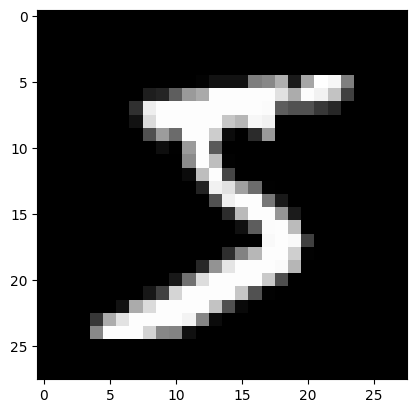

In [ ]:
plt.imshow(x_train[0])

Add noise

In [ ]:
noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

In [ ]:
x_train.shape


(60000, 28, 28, 1)

In [ ]:
#clip the values in the range of 0-1
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

EDA

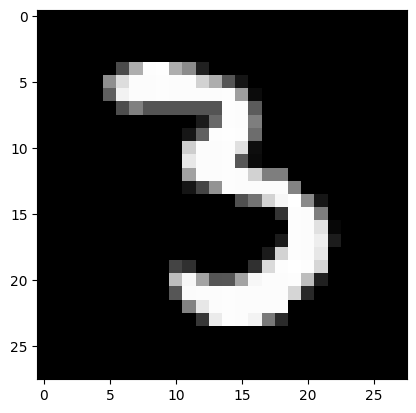

In [ ]:
index = np.random.randint(len(x_test))

plt.imshow(x_test[index].reshape(28,28))
plt.gray()

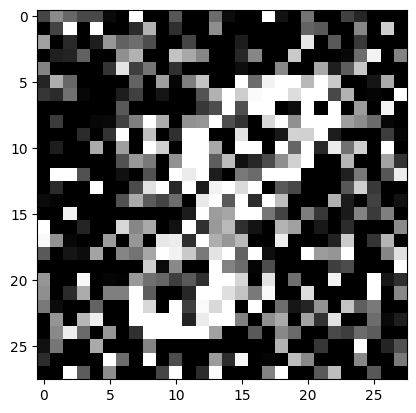

In [ ]:
index = np.random.randint(len(x_test))
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

## MODEL CREATION

In [ ]:
model = Sequential([
    #encoder
    Conv2D(32,3,activation='relu',padding='same',input_shape = (28,28,1)),
    MaxPooling2D(2,padding='same'),
    Conv2D(16,3,activation='relu',padding='same'),
    MaxPooling2D(2,padding='same'),
    #decoder network
    Conv2D(16,3,activation='relu',padding='same'),
    UpSampling2D(2),
    Conv2D(16,3,activation='relu',padding='same'),
    UpSampling2D(2),
    #output layer
    Conv2D(1,3,activation='sigmoid',padding='same')
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 16)       0

In [ ]:
model.fit(x_tr,x_traiain_noisyn,epochs=20,batch_size=256,validation_data=(x_test_noisy,x_test))

Epoch 1/20
235/235 [==============================] - 16s 11ms/step - loss: 0.2630 - accuracy: 0.7951 - val_loss: 0.1521 - val_accuracy: 0.8031
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1433 - accuracy: 0.8064 - val_loss: 0.1357 - val_accuracy: 0.8067
Epoch 3/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1346 - accuracy: 0.8077 - val_loss: 0.1308 - val_accuracy: 0.8065
Epoch 4/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1306 - accuracy: 0.8084 - val_loss: 0.1281 - val_accuracy: 0.8088
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1280 - accuracy: 0.8088 - val_loss: 0.1256 - val_accuracy: 0.8075
Epoch 6/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1259 - accuracy: 0.8092 - val_loss: 0.1238 - val_accuracy: 0.8085
Epoch 7/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1245 - accuracy: 0.8094 - val_loss: 0.1225 - val_accuracy: 0.8085
Epoc

VISUALIZE THE RESULT

In [ ]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


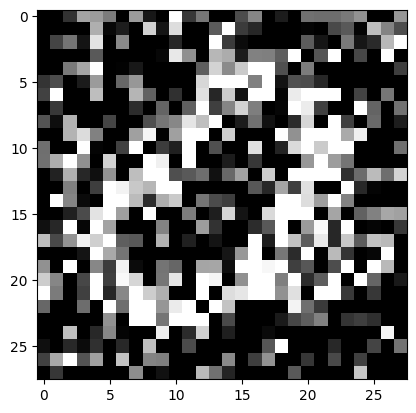

In [ ]:
index = np.random.randint(len(x_test))
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

<function matplotlib.pyplot.gray()>

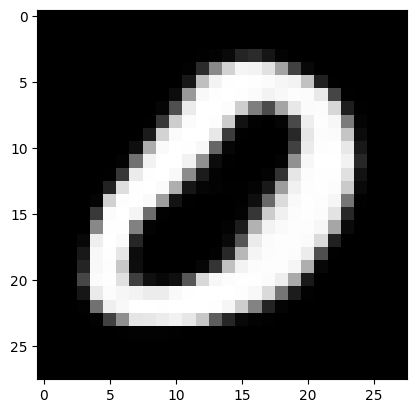

In [ ]:
plt.imshow(pred[index].reshape(28,28))
plt.gray